انجام امور مقدماتی

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import SeyyedzadehHelpers.FarsiHelper as myFarsiHelper
import SeyyedzadehHelpers.SocialNetworkHelper as myNetwork

ایجاد گراف خالی

In [3]:
G = nx.Graph()

خواندن اطلاعات از فایل و افزودن یالها به گراف ایجاد شده

In [3]:
import csv

data = open("com-friendster.top5000.cmty.txt", "r")
reader = csv.reader(data, delimiter="\t")
allRows = [tuple(row) for row in reader]
for row in allRows:
    sourceNode = row[0]
    for i in range(1, len(row)):
        targetNode = row[i]
        G.add_edge(sourceNode, targetNode)

39 Degree distribution

محاسبه توزیع درجه و رسم نمودار آن

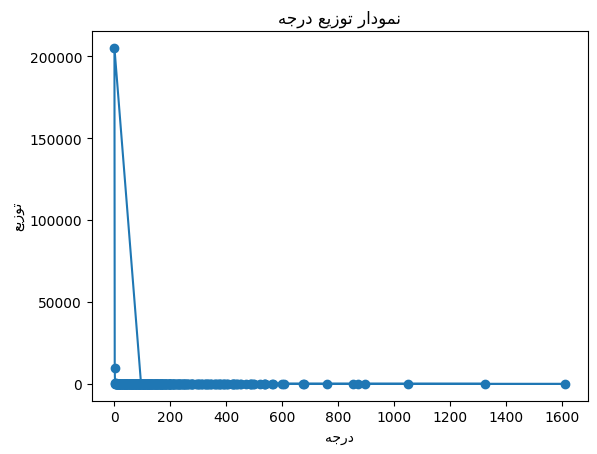

In [4]:
degrees = G.degree()
degreeDistribution = myNetwork.GetDegreeDistribiution(degrees)
plt.plot(degreeDistribution.keys(), degreeDistribution.values(), marker="o")
plt.xlabel(myFarsiHelper.CorrectFarsi("درجه"))
plt.ylabel(myFarsiHelper.CorrectFarsi("توزیع"))
plt.title(myFarsiHelper.CorrectFarsi("نمودار توزیع درجه"))
plt.show()

40 Path length distribution

محاسبه توزیع کوتاهترین مسیر

In [ ]:
pathList = nx.all_pairs_shortest_path_length(G)
pathDistribution = myNetwork.GetShortestPathDistribution(pathList)

top100 = dict()
for x in list(pathDistribution)[0:100]:
    top100[x] = pathDistribution[x]
plt.plot(top100.keys(), top100.values(), marker="o")
plt.xlabel(myFarsiHelper.CorrectFarsi("کوتاهترین مسیر"))
plt.ylabel(myFarsiHelper.CorrectFarsi("توزیع"))
plt.title(myFarsiHelper.CorrectFarsi("نمودار توزیع کوتاهترین مسیر"))
plt.show()

41 WCC size distribution

محاسبه توزیع اندازه کامپوننتهای اتصال ضعیف

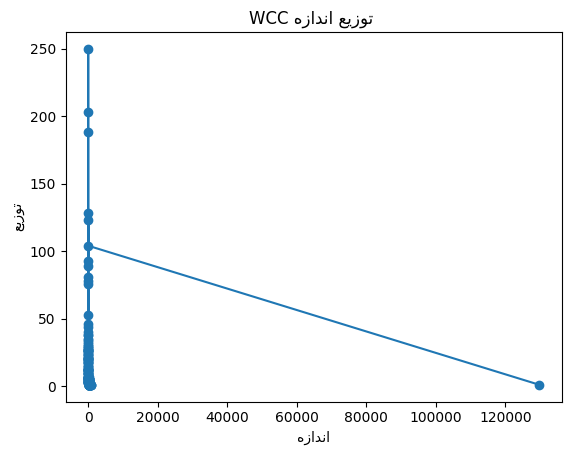

In [4]:
conectedComponents = nx.connected_components(G)
wccSizeDistribution = myNetwork.GetWCC_SizeDistribution(conectedComponents)
plt.plot(wccSizeDistribution.keys(), wccSizeDistribution.values(), marker="o")
plt.xlabel(myFarsiHelper.CorrectFarsi("اندازه"))
plt.ylabel(myFarsiHelper.CorrectFarsi("توزیع"))
plt.title(myFarsiHelper.CorrectFarsi("WCC توزیع اندازه "))
plt.show()

42 Clustering coefficient distribution

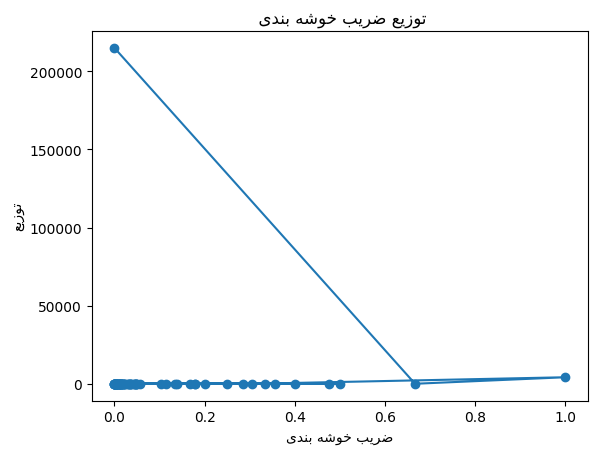

In [15]:
clusteringCoefficients = nx.clustering(G)
clusteringCoefficientsDistribiution = myNetwork.GetClusteringCoefficientDistribution(
    clusteringCoefficients
)

top100 = dict()
for x in list(clusteringCoefficientsDistribiution)[0:100]:
    top100[x] = clusteringCoefficientsDistribiution[x]

plt.plot(top100.keys(), top100.values(), marker="o")
plt.xlabel(myFarsiHelper.CorrectFarsi("ضریب خوشه بندی"))
plt.ylabel(myFarsiHelper.CorrectFarsi("توزیع"))
plt.title(myFarsiHelper.CorrectFarsi(" توزیع ضریب خوشه بندی  "))
plt.show()

43 k-core node size distribution

محاسبه توزیع شماره core

In [7]:
coreNumberList = nx.core_number(G)
myNetwork.GetCoreNumberDistribution(coreNumberList)
# plt.plot(coreNumberDistribiution.keys(), coreNumberDistribiution.values(), marker='o')
# plt.xlabel(myFarsiHelper.CorrectFarsi('شماره core'))
# plt.ylabel(myFarsiHelper.CorrectFarsi('توزیع'))
# plt.title(myFarsiHelper.CorrectFarsi(' توزیع شماره core  '))
# plt.show()

{}

44 Average friends-of-friends distribution

توزیع متوسط همسایه همسایگان گره ها

In [8]:
friendsOfFriendsAvg = dict()
friendsOfFriends = []
for node in G.nodes():
    friendsOfFriends.clear()
    for friend in G.neighbors(G.neighbors(friend)):
        if friend != node & friend not in friendsOfFriends:
            friendsOfFriends.append(friend)
    if (len(list(G.neighbors(node)))) == 0:
        friendsOfFriendsAvg[node] = 0
    else:
        friendsOfFriendsAvg[node] = len(friendsOfFriends) / len(list(G.neighbors(node)))
    friendsOfFriendsDistribution = dict()
    for key in friendsOfFriendsAvg:
        if friendsOfFriendsAvg[key] in friendsOfFriendsDistribution.keys():
            friendsOfFriendsDistribution[friendsOfFriendsAvg[key]] += 1
        else:
            friendsOfFriendsDistribution[friendsOfFriendsAvg[key]] = 1

45 Average neighbour degree distribution

توزیع متوسط درجه همسایگان  گره ها

In [13]:
neighborDegreeAVG = dict()
neighborDegreeAVGDistribution = dict()

for node in G.nodes():
    totlaDegree = 0
    degreeCount = 0
    for neighbor in G.neighbors(node):
        totlaDegree += G.degree(neighbor)
        degreeCount += 1
        if degreeCount == 0:
            neighborDegreeAVG[node] = 0
        else:
            neighborDegreeAVG[node] = totlaDegree / degreeCount
for node in neighborDegreeAVG.keys():
    if neighborDegreeAVG[node] in neighborDegreeAVGDistribution.keys():
        neighborDegreeAVGDistribution[neighborDegreeAVG[node]] += 1
    else:
        neighborDegreeAVGDistribution[neighborDegreeAVG[node]] = 1